In [21]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Reading the input files
adjacency = pd.read_csv("/kaggle/input/da324dataminingproject2/adjacency.csv")
attributes = pd.read_excel("/kaggle/input/da324dataminingproject2/attributes.xlsx")
seed = pd.read_excel("/kaggle/input/da324dataminingproject2/seed.xlsx", header=None)

In [13]:
adjacency_np = adjacency.to_numpy()
attributes_np = attributes.to_numpy().T

In [14]:
# Function to Compute Cosine Similarity Matrix
def cosine_similarity_matrix(vectors):
    norm = np.linalg.norm(vectors, axis=1)
    normalized_vectors = vectors / norm[:, np.newaxis]
    return np.dot(normalized_vectors, normalized_vectors.T)

In [15]:
# Compute similarity
similarity_matrix = cosine_similarity_matrix(attributes_np)

# Compute Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(similarity_matrix)

In [7]:
np.save('eigenvalues.npy', eigenvalues)
np.save('eigenvectors.npy', eigenvectors)

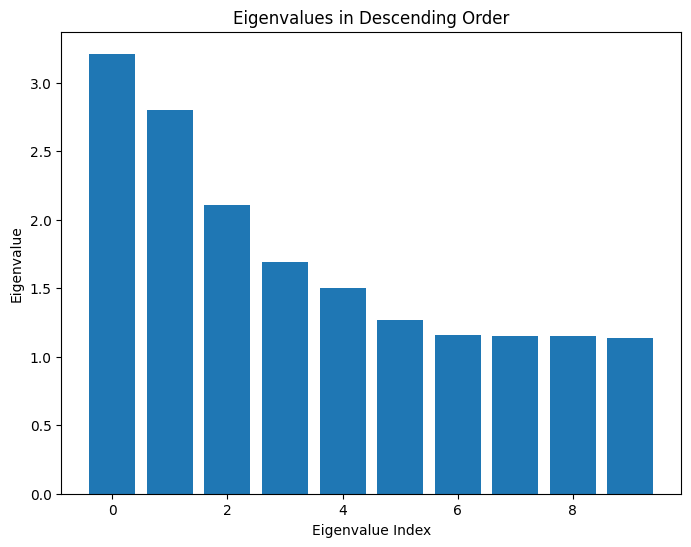

In [16]:
# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(sorted_eigenvalues[:10])), sorted_eigenvalues[:10])
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues in Descending Order')
plt.savefig('eigenvalues_descending.png')
plt.show()

We see that it is sufficient to reconstruct using only the first 3 eigenvectors.

In [17]:
# Select Top 3 Eigenvectors
top_eigenvectors = eigenvectors[:, -3:]
top_eigenvectors.shape

(103, 3)

In [18]:
# Reconstructing using 3 eigenvectors to reduce noise
reconstructed_vectors = np.dot(attributes_np.T, top_eigenvectors)
reconstructed_vectors.shape

(11952, 3)

In [19]:
clean_attributes = pd.DataFrame(reconstructed_vectors)
clean_attributes.head()

,0,1,2
0,2.285042,4.903614,-10.936785
1,0.646299,2.734040,-13.252241
2,-25.614545,16.030439,-45.454776
3,-14.550315,-19.958579,-32.654159
4,-9.566526,27.878001,-32.286060


In [20]:
clean_attributes.to_csv('clean_attributes.csv', index=False)

In [22]:
# Initializing PCA to convert 3D attribute vectors into 2D
pca = PCA(n_components=2)
pca_attributes = pca.fit_transform(clean_attributes)

In [23]:
# Storing K-Means initializations using first row of seed
kmeans_seeds = []

for i in range(10):
    kmeans_seeds.append(pca_attributes[seed[0][i], :])
    
kmeans_seeds = np.array(kmeans_seeds)

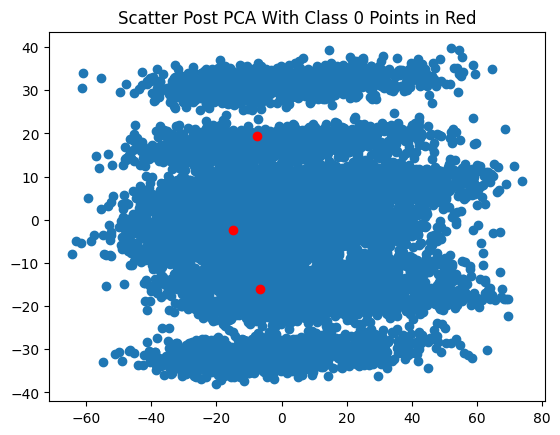

In [24]:
# Visualizing the attributes
plt.scatter(x=pca_attributes[:, 0], y=pca_attributes[:, 1])

for i in range(3):
    plt.plot(pca_attributes[seed[0][i], 0], pca_attributes[seed[0][i], 1], 'ro')

plt.title("Scatter Post PCA With Class 0 Points in Red")
plt.savefig('scatter_pca_clean.png')
plt.show()